<a href="https://colab.research.google.com/github/panghanwu/pytorch_example/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt


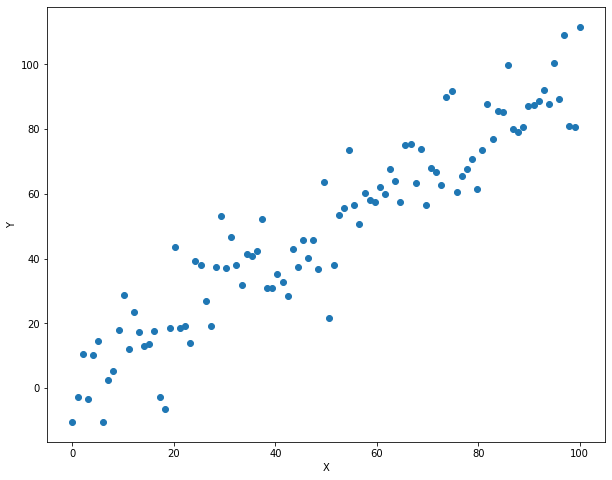

In [7]:
"""Make fake data"""
x = torch.linspace(0, 100).type(torch.FloatTensor)

rand = torch.randn(100) * 10
y = x + rand

plt.figure(figsize=(10,8))
plt.plot(x.numpy(), y.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

$ L = \sum_{i}^{N} (y_i - ax_i - b)$  


In [8]:
# initialize
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

learning_rate = 0.0001

print(a, b)

tensor([0.3867], requires_grad=True) tensor([0.6465], requires_grad=True)


In [9]:
a.expand_as(x).shape

torch.Size([100])

In [10]:
"""Gradient descent"""

for i in range(1000):
    forwards = a.expand_as(x) * x + b.expand_as(x)
    loss = torch.mean((forwards-y)**2)
    if i%100 == 0 :
        print('loss:', loss)
    
    loss.backward()
    a.data.add_(-learning_rate*a.grad)
    b.data.add_(-learning_rate*b.grad)

    a.grad.data.zero_()
    b.grad.data.zero_()


loss: tensor(1228.3533, grad_fn=<MeanBackward0>)
loss: tensor(102.8470, grad_fn=<MeanBackward0>)
loss: tensor(102.8429, grad_fn=<MeanBackward0>)
loss: tensor(102.8389, grad_fn=<MeanBackward0>)
loss: tensor(102.8349, grad_fn=<MeanBackward0>)
loss: tensor(102.8309, grad_fn=<MeanBackward0>)
loss: tensor(102.8270, grad_fn=<MeanBackward0>)
loss: tensor(102.8231, grad_fn=<MeanBackward0>)
loss: tensor(102.8192, grad_fn=<MeanBackward0>)
loss: tensor(102.8154, grad_fn=<MeanBackward0>)


<function matplotlib.pyplot.show>

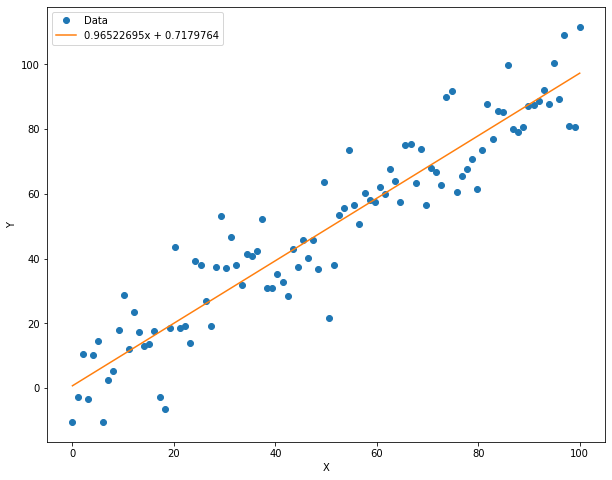

In [13]:
x_data = x.numpy()
y_fit = a.data.numpy() * x_data + b.data.numpy()

# plot
plt.figure(figsize=(10,8))
xplot, = plt.plot(x_data, y.numpy(), 'o')
yplot, = plt.plot(x_data, y_fit)

# label
plt.xlabel('X')
plt.ylabel('Y')

formula = str(a.data.numpy()[0]) + 'x + ' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', formula])

plt.show